In [27]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from windrose import WindroseAxes
%matplotlib inline     
sns.set(color_codes=True)

togo_df = pd.read_csv("../data/togo-dapaong_qc.csv")
togo_df.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

1. **Summary statistics**

In [28]:
togo_df.describe(percentiles=[0.5]).T

,count,mean,std,min,50%,max
GHI,525600.0,230.555040,322.532347,-12.7,2.1,1424.0
DNI,525600.0,151.258469,250.956962,0.0,0.0,1004.5
DHI,525600.0,116.444352,156.520714,0.0,2.5,805.7
ModA,525600.0,226.144375,317.346938,0.0,4.4,1380.0
ModB,525600.0,219.568588,307.932510,0.0,4.3,1367.0
Tamb,525600.0,27.751788,4.758023,14.9,27.2,41.4
RH,525600.0,55.013160,28.778732,3.3,59.3,99.8
WS,525600.0,2.368093,1.462668,0.0,2.2,16.1
WSgust,525600.0,3.229490,1.882565,0.0,2.9,23.1
WSstdev,525600.0,0.557740,0.268923,0.0,0.5,4.7


2. **Data Quality Check**

In [29]:
togo_df.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

From the output above, there are no missing values for all columns from the dataset except for the 'Comments' column.
The total number of missing values for this column *equals* the number of rows for the dataset. This indicates that
there is no data for the 'Comments' column for all records. Therefore, the 'Comments' column must be _dropped_.

In [30]:
# Drop 'Comments' column
togo_df = togo_df.dropna(axis=1,thresh=100000)
togo_df.count()

Timestamp        525600
GHI              525600
DNI              525600
DHI              525600
ModA             525600
ModB             525600
Tamb             525600
RH               525600
WS               525600
WSgust           525600
WSstdev          525600
WD               525600
WDstdev          525600
BP               525600
Cleaning         525600
Precipitation    525600
TModA            525600
TModB            525600
dtype: int64

In [31]:
df_excluded = togo_df.drop(columns=['Timestamp'])
# Function to count outliers for a specific column
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return len(outliers)

# Count outliers for every column
outlier_counts = df_excluded.apply(count_outliers)

print("Outlier counts for each column:")
print(outlier_counts)

Outlier counts for each column:
GHI               1303
DNI              50586
DHI               7905
ModA              1237
ModB              1537
Tamb                 0
RH                   0
WS                8708
WSgust            7377
WSstdev          14669
WD                   0
WDstdev           6921
BP               19228
Cleaning           281
Precipitation     3338
TModA              137
TModB              573
dtype: int64


Using interquartile range(IQR) for determining outliers, the output of the cell above indicates the number of outliers for each column.

In [32]:
def remove_outliers(column):
    if column.name != "Timestamp":
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        #print(df_no_outliers[column.name])
        return column[(column >= lower_bound) & (column <= upper_bound)]
    else:
        return column
    
df_no_outliers = togo_df.apply(remove_outliers)
df_no_outliers.count()


Timestamp        525600
GHI              524297
DNI              475014
DHI              517695
ModA             524363
ModB             524063
Tamb             525600
RH               525600
WS               516892
WSgust           518223
WSstdev          510931
WD               525600
WDstdev          518679
BP               506372
Cleaning         525319
Precipitation    522262
TModA            525463
TModB            525027
dtype: int64

In [55]:
#Function to count the number of negative values for a given column
def count_negatives(column):
    negtvs = [ x for x in column if x < 0]
    return len(negtvs)
    
# Count outliers for every column
negative_counts = df_excluded.apply(count_negatives)
#negative_counts = count_negatives(benin_df['GHI'])
print("Negative value counts for each column:")
print(negative_counts)

Negative value counts for each column:
GHI              257385
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
dtype: int64


The above output shows that almost half of the dataset contains negative values for the irradiance measurements, which is erroneous. Therefore, those rows containing negative values must be removed before doing further analysis.

In [34]:
# Filter out rows where 'GHI' is less than 0
df_corrected = df_no_outliers[df_no_outliers['GHI'] >= 0]

# Filter out rows where 'DNI' is less than 0
df_corrected = df_no_outliers[df_no_outliers['DNI'] >= 0]

# Filter out rows where 'DHI' is less than 0
df_corrected = df_no_outliers[df_no_outliers['DHI'] >= 0]

df_corrected.shape


(517695, 18)

3.**Time Series Analysis**

_GHI across Time_

C:\Users\MIT\AppData\Local\Temp\ipykernel_15028\2111871994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corrected['Timestamp'] = pd.to_datetime(df_corrected['Timestamp'])


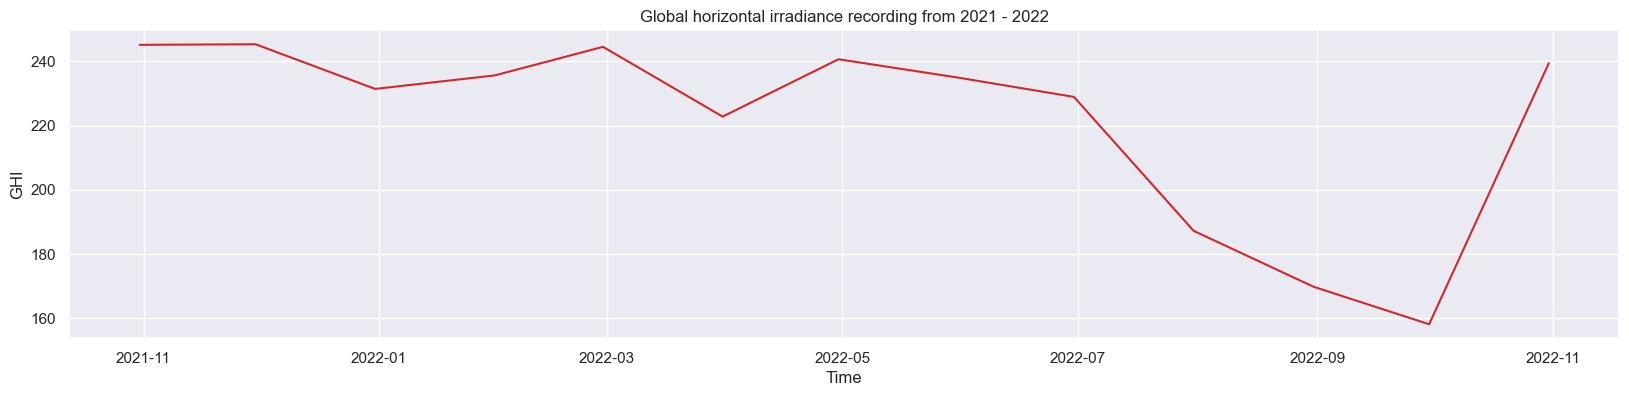

In [35]:
df_corrected['Timestamp'] = pd.to_datetime(df_corrected['Timestamp'])
ts_indexed_df = df_corrected.loc[:, ['Timestamp', 'GHI']]
ts_indexed_df.set_index('Timestamp',inplace=True)
monthly_data =ts_indexed_df.resample('ME').mean()

def plot_df(df, x, y, title="", xlabel='Time', ylabel='GHI', dpi=100):
    plt.figure(figsize=(20,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(monthly_data, x=monthly_data.index, y=monthly_data['GHI'], title='Global horizontal irradiance recording from 2021 - 2022')

_DNI across Time_

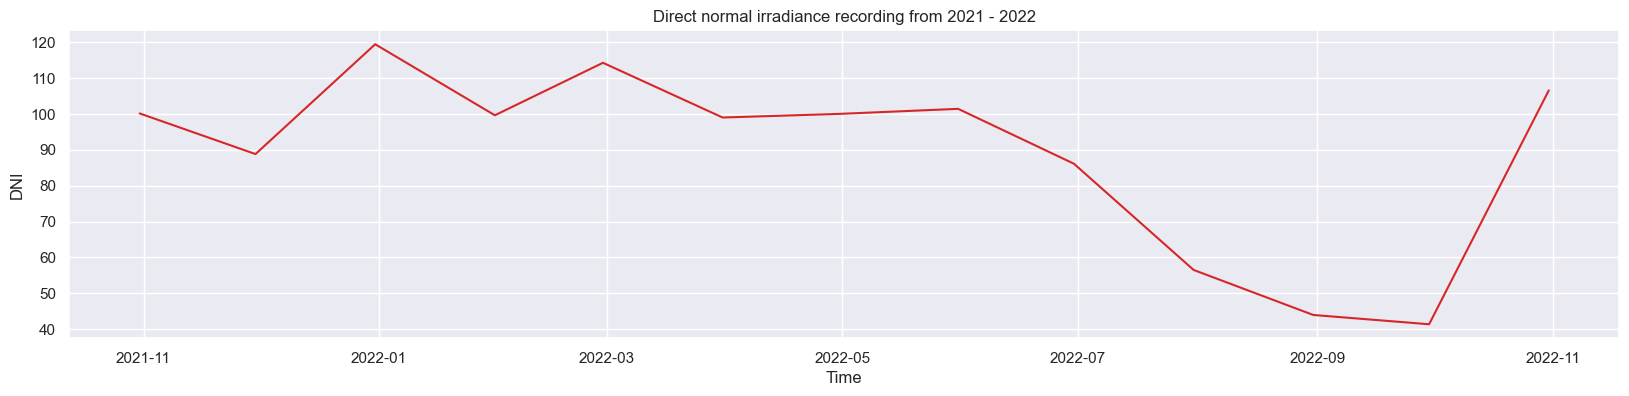

In [36]:
ts_indexed_df = df_corrected.loc[:, ['Timestamp', 'DNI']]
ts_indexed_df.set_index('Timestamp',inplace=True)
monthly_data =ts_indexed_df.resample('ME').mean()

def plot_df(df, x, y, title="", xlabel='Time', ylabel='DNI', dpi=100):
    plt.figure(figsize=(20,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(monthly_data, x=monthly_data.index, y=monthly_data['DNI'], title='Direct normal irradiance recording from 2021 - 2022')

_DHI across Time_

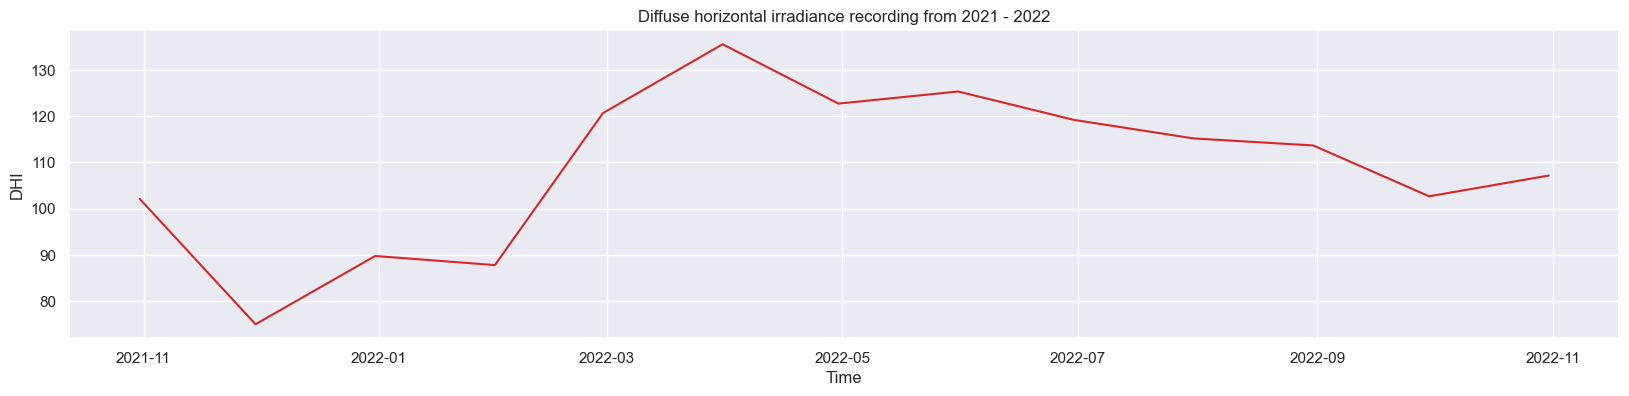

In [37]:
ts_indexed_df = df_corrected.loc[:, ['Timestamp', 'DHI']]
ts_indexed_df.set_index('Timestamp',inplace=True)
monthly_data =ts_indexed_df.resample('ME').mean()

def plot_df(df, x, y, title="", xlabel='Time', ylabel='DHI', dpi=100):
    plt.figure(figsize=(20,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(monthly_data, x=monthly_data.index, y=monthly_data['DHI'], title='Diffuse horizontal irradiance recording from 2021 - 2022')

_Ambient temprature across Time_

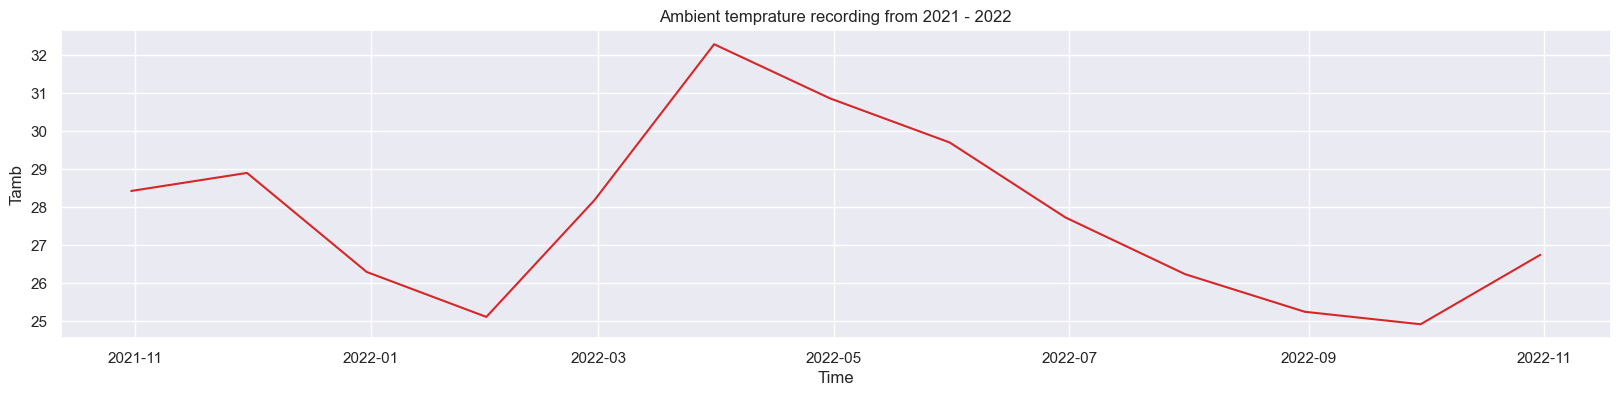

In [38]:
ts_indexed_df = df_corrected.loc[:, ['Timestamp', 'Tamb']]
ts_indexed_df.set_index('Timestamp',inplace=True)
monthly_data =ts_indexed_df.resample('ME').mean()

def plot_df(df, x, y, title="", xlabel='Time', ylabel='Tamb', dpi=100):
    plt.figure(figsize=(20,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(monthly_data, x=monthly_data.index, y=monthly_data['Tamb'], title='Ambient temprature recording from 2021 - 2022')

4.**Correlation Analysis**

In [39]:
df_extracted = df_corrected.loc[:,['GHI','DNI','DHI','TModA','TModB']]
df_extracted.corr()

,GHI,DNI,DHI,TModA,TModB
GHI,1.000000,0.841818,0.851772,0.897665,0.920076
DNI,0.841818,1.000000,0.620242,0.729843,0.749478
DHI,0.851772,0.620242,1.000000,0.808522,0.829034
TModA,0.897665,0.729843,0.808522,1.000000,0.986045
TModB,0.920076,0.749478,0.829034,0.986045,1.000000


5. **Wind Analysis**

_Wind speed time series analysis_

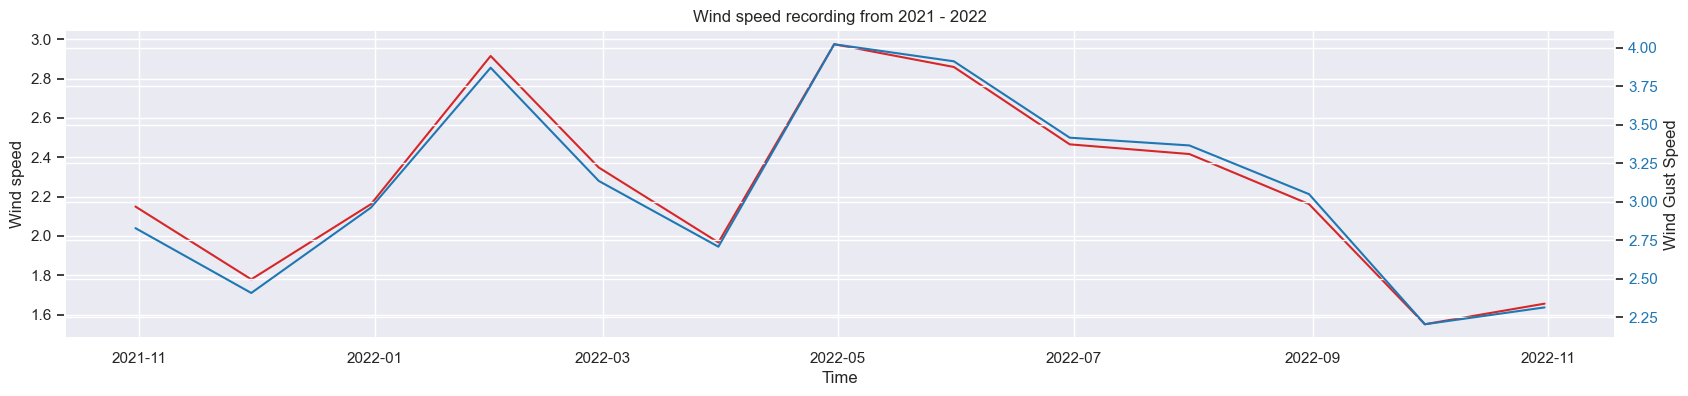

In [40]:
ws_indexed_df = df_corrected.loc[:, ['Timestamp', 'WS', 'WSgust']]
ws_indexed_df.set_index('Timestamp',inplace=True)
monthly_data =ws_indexed_df.resample('ME').mean()

def plot_df(df, x, y1 ,y2, title="", xlabel='Time', ylabel1='Wind speed',ylabel2='Wind Gust Speed', dpi=100):
    plt.figure(figsize=(20,4), dpi=dpi)
    plt.plot(x, y1, color='tab:red', label=ylabel1)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel1)
    ax2 = plt.gca().twinx()
    ax2.plot(x, y2, color='tab:blue', label=ylabel2)
    ax2.set_ylabel(ylabel2)
    ax2.tick_params(axis='y', labelcolor='tab:blue')
    plt.show()
    
plot_df(monthly_data, x=monthly_data.index, y1=monthly_data['WS'],y2=monthly_data['WSgust'], title='Wind speed recording from 2021 - 2022') 

_Windrose plot for speed and direction of wind_

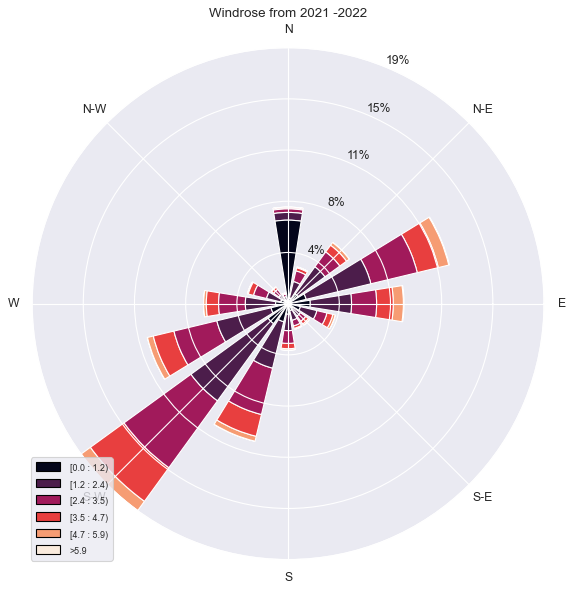

In [41]:
wd = df_corrected['WD']
ws = df_corrected['WS']
ax = WindroseAxes.from_ax()
ax.set_title("Windrose from 2021 -2022")
ax.bar(wd,ws,normed=True)
ax.set_legend()

fmt = '%.0f%%' 
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)

plt.show()

6. **Temperature Analysis**

In [42]:
df_temp = df_corrected.loc[:,['Tamb','TModA','TModB']]
df_temp.corr()

,Tamb,TModA,TModB
Tamb,1.000000,0.805818,0.742155
TModA,0.805818,1.000000,0.986045
TModB,0.742155,0.986045,1.000000


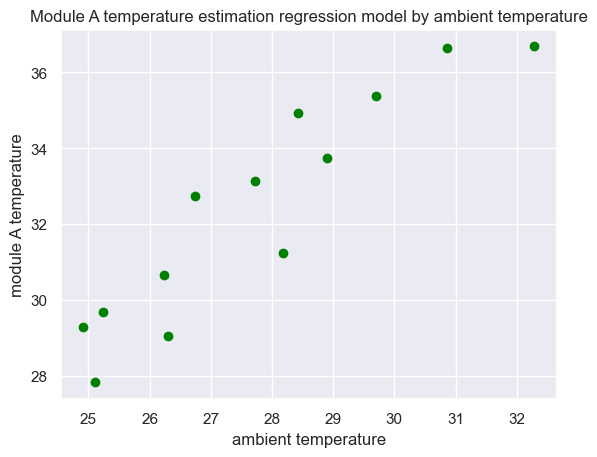

In [43]:
monthly_temp_data = df_corrected.loc[:, ['Timestamp', 'Tamb','TModA','TModB']]
monthly_temp_data.set_index('Timestamp',inplace=True)
monthly_temp_data =monthly_temp_data.resample('ME').mean()

plt.scatter(monthly_temp_data['Tamb'],monthly_temp_data['TModA'], color ="green")
plt.title('Module A temperature estimation regression model by ambient temperature')
plt.xlabel('ambient temperature')
plt.ylabel('module A temperature')
plt.show()

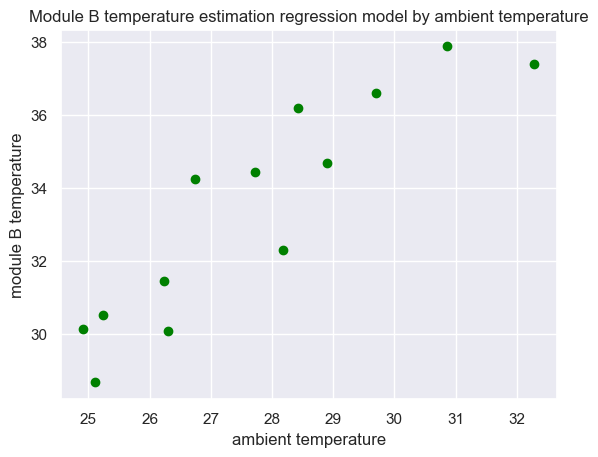

In [44]:
plt.scatter(monthly_temp_data['Tamb'],monthly_temp_data['TModB'], color ="green")
plt.title('Module B temperature estimation regression model by ambient temperature')
plt.xlabel('ambient temperature')
plt.ylabel('module B temperature')
plt.show()

7. **Histogram**

Text(0.5, 0, 'Variables')

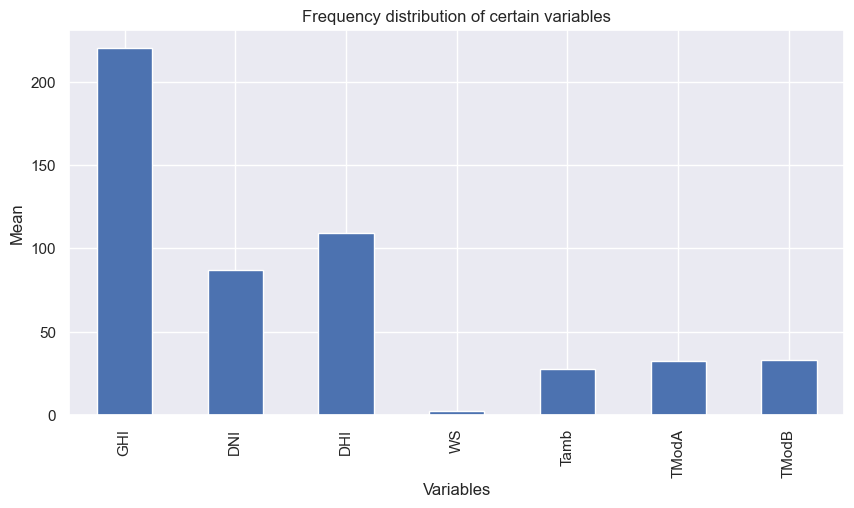

In [45]:
df_histo = df_corrected.loc[:, ['GHI', 'DNI', 'DHI', 'WS', 'Tamb','TModA','TModB']]

#df_histo.set_index('Timestamp',inplace = True)
#df_histo = df_histo.resample('ME').mean()
df_histo.mean().plot(kind='bar', figsize=(10,5))

plt.title("Frequency distribution of certain variables")
plt.ylabel('Mean')
plt.xlabel('Variables')

8. **Box Plot**

<Axes: xlabel='GHI'>

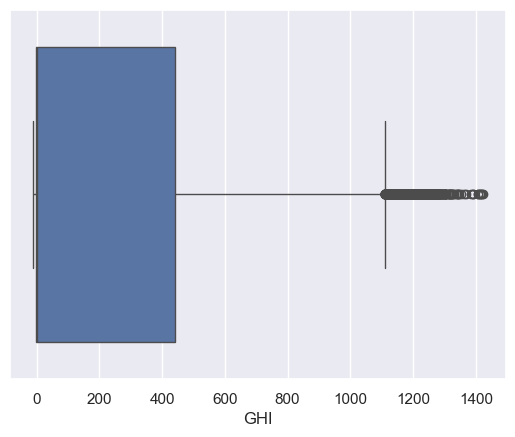

In [46]:
sns.boxplot(x=togo_df['GHI'])

<Axes: xlabel='DNI'>

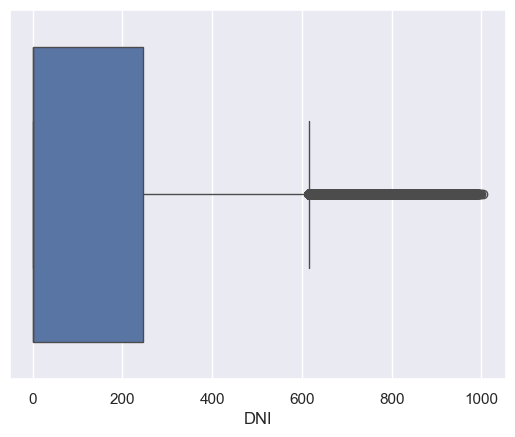

In [47]:
sns.boxplot(x=togo_df['DNI'])

<Axes: xlabel='DHI'>

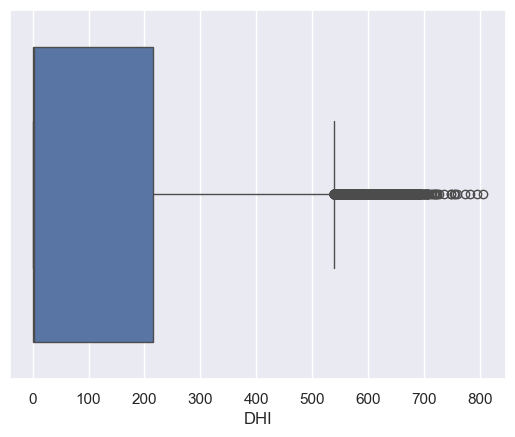

In [48]:
sns.boxplot(x=togo_df['DHI'])

<Axes: xlabel='Tamb'>

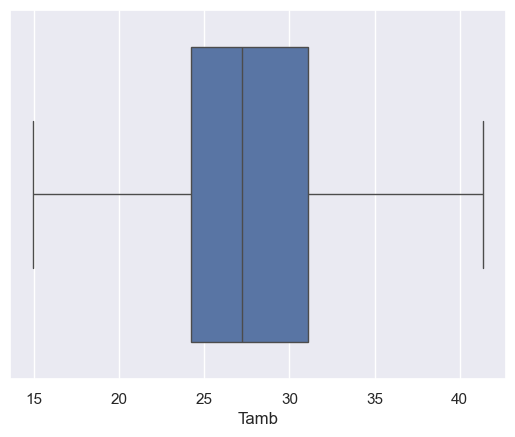

In [49]:
sns.boxplot(x=togo_df['Tamb'])

<Axes: xlabel='TModA'>

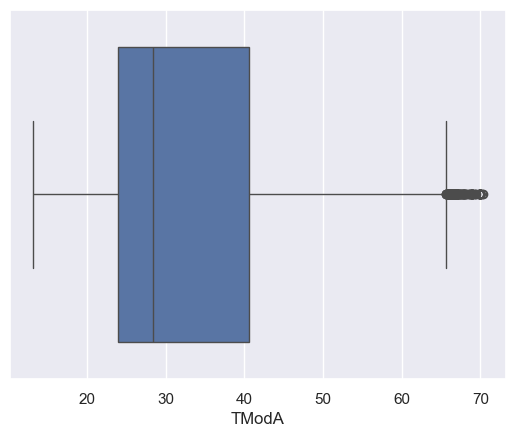

In [50]:
sns.boxplot(x=togo_df['TModA'])

<Axes: xlabel='TModB'>

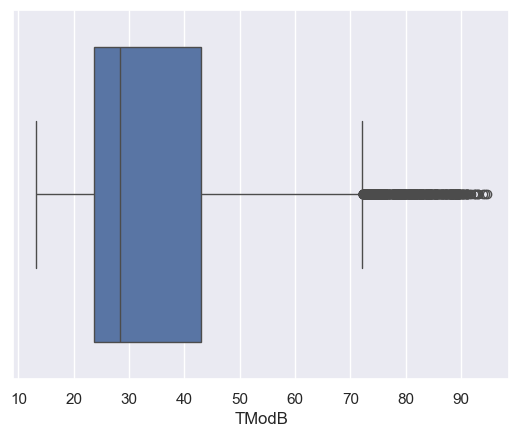

In [51]:
sns.boxplot(x=togo_df['TModB'])

In [52]:
df_corrected.describe(percentiles=[0.5]).T

,count,mean,min,50%,max,std
Timestamp,517695,2022-04-25 02:42:18.482658560,2021-10-25 00:01:00,2022-04-25 11:47:00,2022-10-25 00:00:00,NaN
GHI,516651.0,220.023853,-12.7,0.1,1109.0,314.271404
DNI,467235.0,87.326071,0.0,0.0,616.0,170.128801
DHI,517695.0,109.250293,0.0,1.2,539.2,146.318356
ModA,516694.0,216.247896,0.0,2.2,1056.2,310.105321
ModB,516422.0,209.592077,0.0,2.1,1027.0,300.474509
Tamb,517695.0,27.694444,14.9,27.2,41.4,4.744451
RH,517695.0,55.122481,3.3,59.4,99.8,28.786763
WS,509189.0,2.276298,0.0,2.2,5.9,1.337185
WSgust,510443.0,3.119735,0.0,2.9,8.1,1.724569
